In [4]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/NOVA_AI/SampleSuperstore.csv")
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
len(dataset)

9994

In [6]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

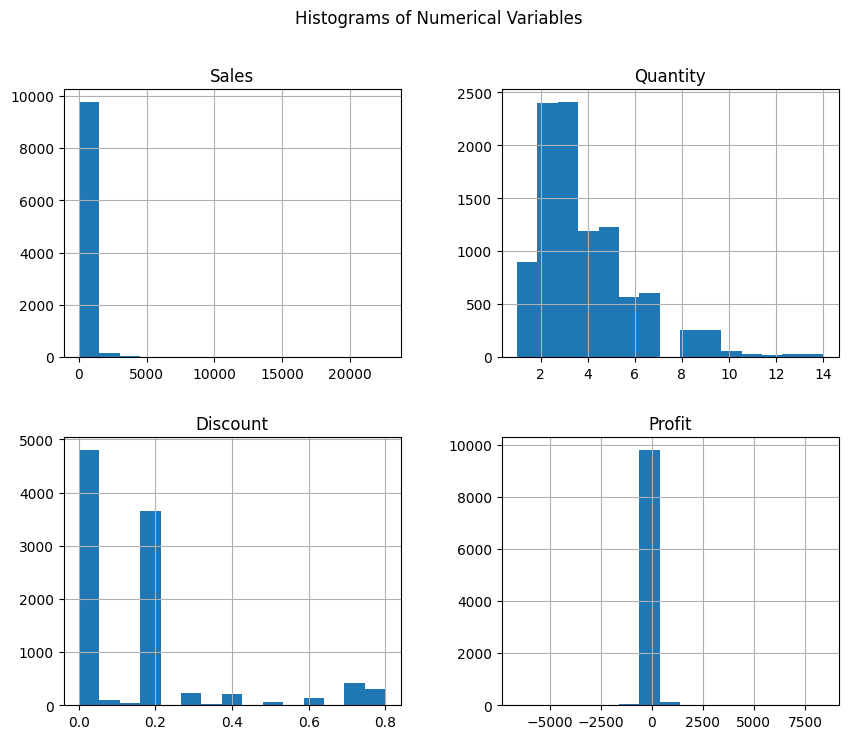

In [8]:
import matplotlib.pyplot as plt

num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
dataset[num_cols].hist(bins=15, figsize=(10, 8))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

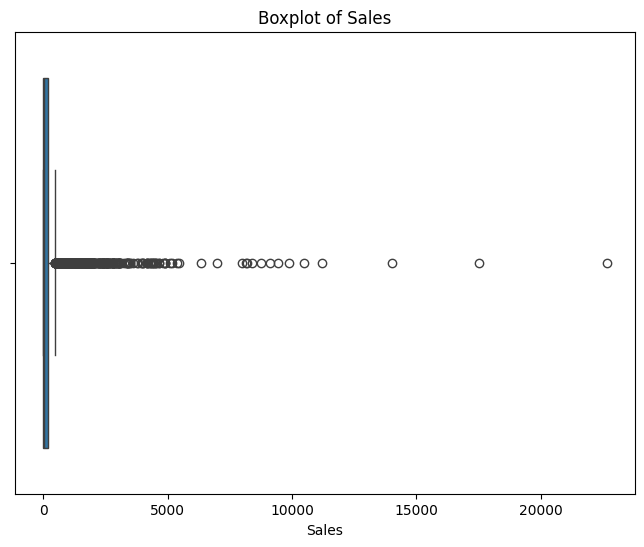

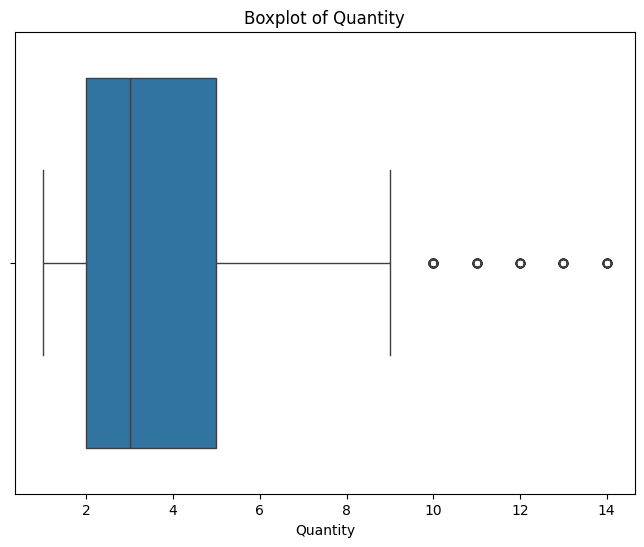

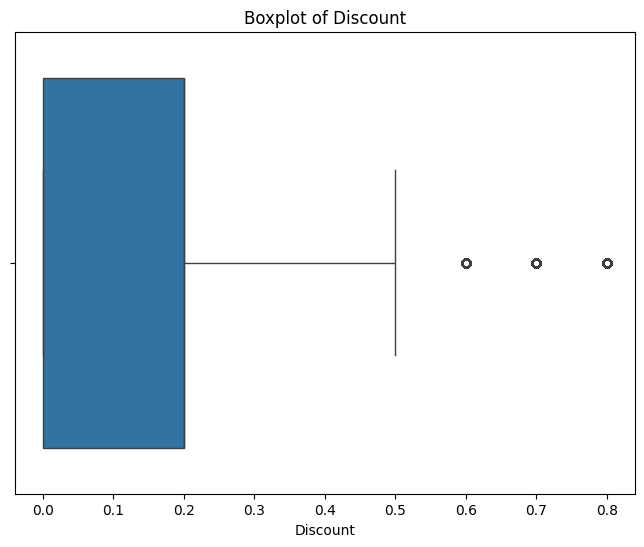

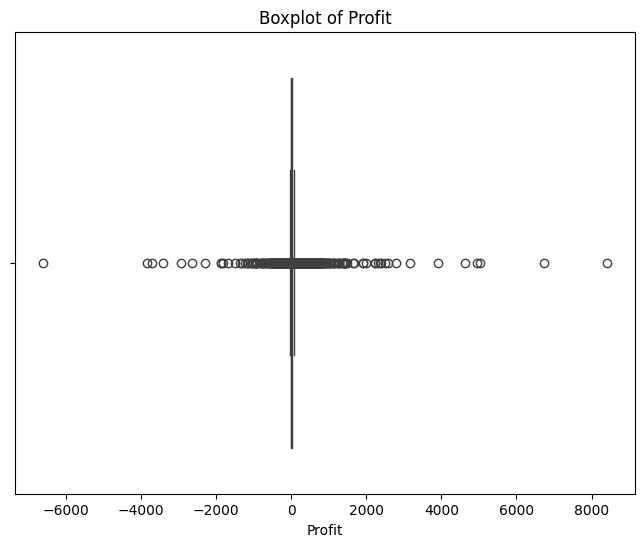

In [10]:
# Box plots for numerical variables
import seaborn as sns
import matplotlib.pyplot as plt
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

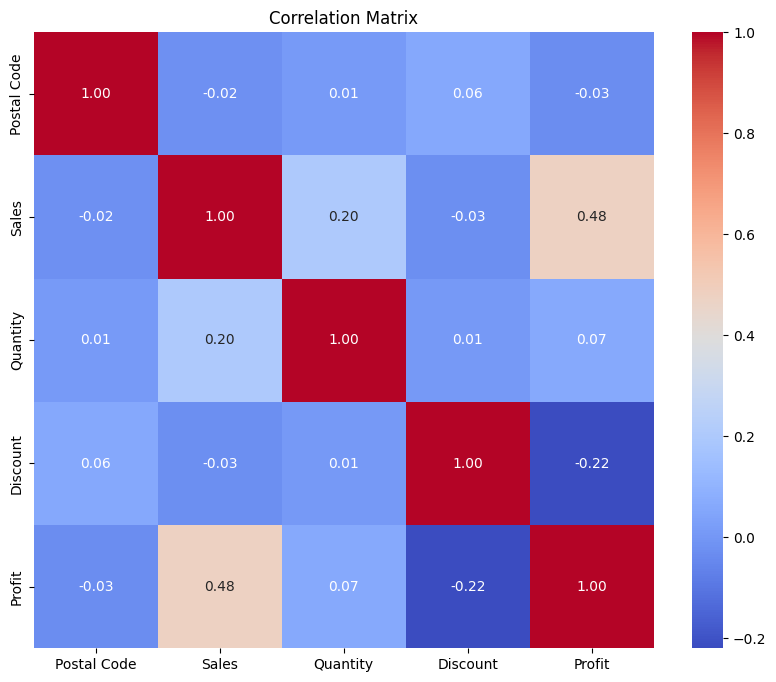

In [13]:
# Exclude non-numeric columns for correlation analysis
import numpy as np
numeric_cols = dataset.select_dtypes(include=[np.number])

# Correlation Analysis
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

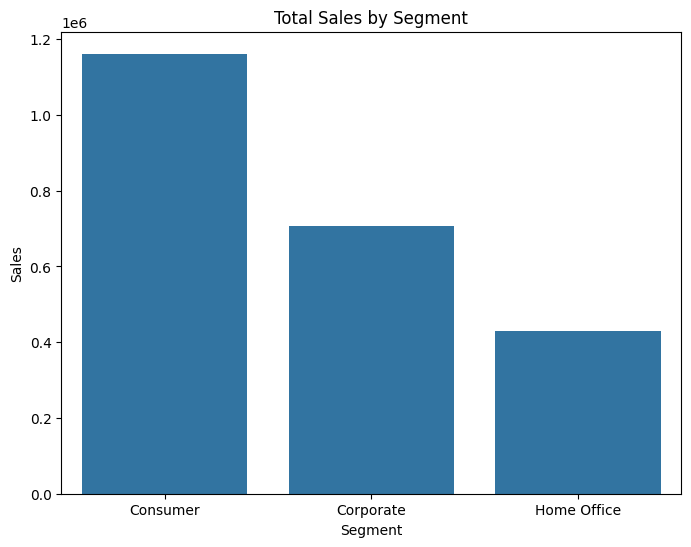

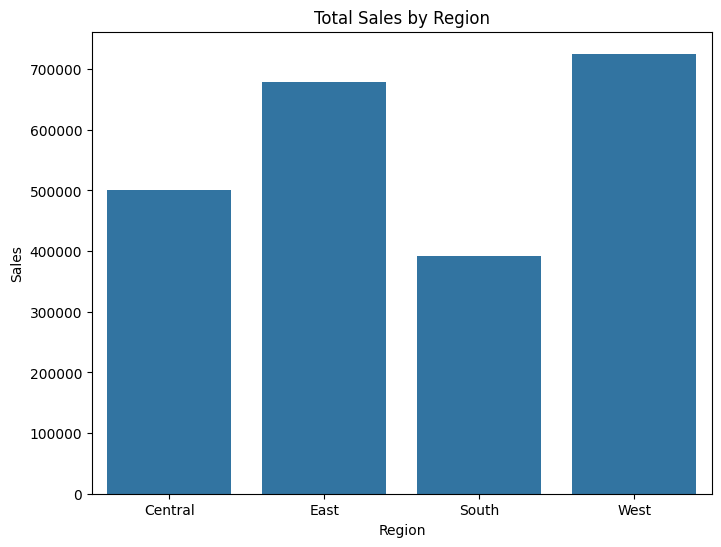

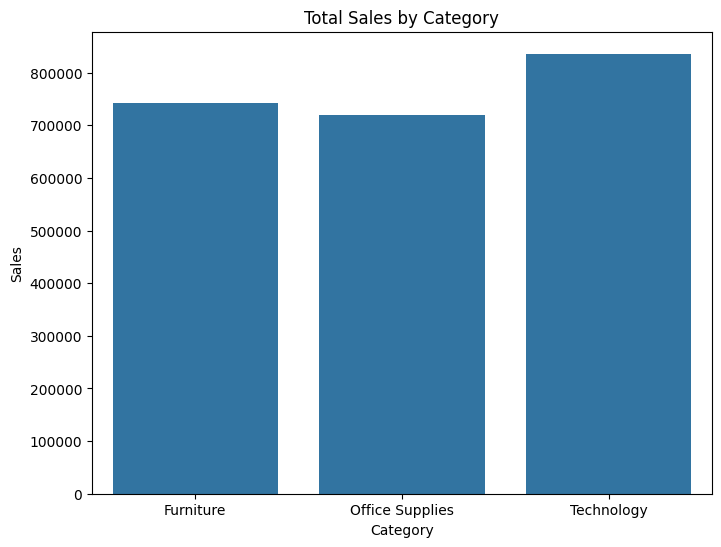

In [14]:
# Segmentation Analysis
segment_sales = dataset.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales)
plt.title('Total Sales by Segment')
plt.show()

region_sales = dataset.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Total Sales by Region')
plt.show()

category_sales = dataset.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Category')
plt.show()

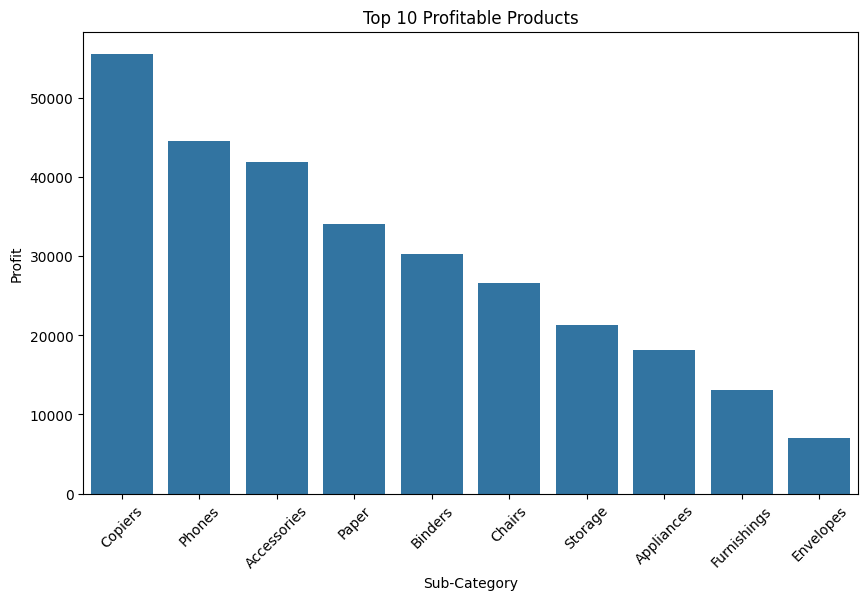

In [15]:
# Profitability Analysis
top_10_profitable_products = dataset.groupby('Sub-Category')['Profit'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=top_10_profitable_products)
plt.title('Top 10 Profitable Products')
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-dfe1bf23be0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Sales', data=dataset, inner="point", palette="muted")


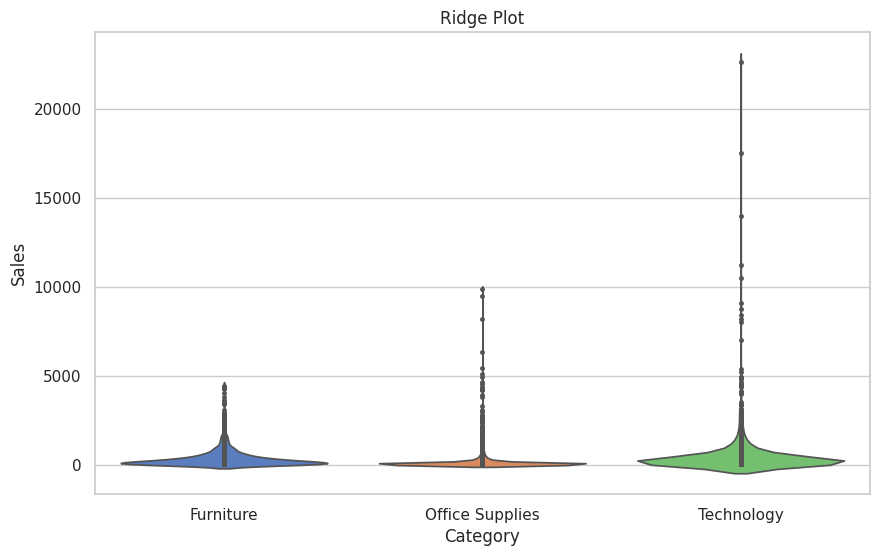

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Sales', data=dataset, inner="point", palette="muted")
plt.title('Ridge Plot')
plt.show()